# Written Report-Property Rentals

### Introduction
Purpose-><br>
Analysis of rentals data <br>
Estimating prices based on different features of the rented property and price charged per night.<br>

Contextual Inforamtion-><br>
Most people leave the platform without signing up.<br>

Question of analysis-><br>
Develop an application to help people estimate the money they could earn renting out their living space.<br>
Avoiding estimating prices that are more than 25 dollars off of the actual price.<br>


### Data validation
We imported the rentals data into a tabular format and checked for null values<br>
->Used SimpleImputer on 'bathrooms' and 'bedrooms' columns for filling in the null values with the respective column's mean<br>
->Used StandardScaler on 'minimum_nights' column for normalizing the feature within a particular range by removing the mean and scaling to unit variance<br>
->Converting 'price' column to float data type.<br>
->Converting categorical variable columns-property and room type to dummy data and storing in a new dataframe<br>
->Used PCA for reducing the dimension to 2 principal components and using barplot to show the variance contributed by each component

In [ ]:
# Importing necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing and reading the data
rentals=pd.read_csv('data/rentals.csv')
rentals

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00
...,...,...,...,...,...,...,...,...,...
8106,39342094,37.74010,-122.41196,House,Private room,2.0,3.0,30,$699.00
8107,39343373,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,$200.00
8108,39344101,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,$69.00
8109,39350028,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,$187.00


In [ ]:
rentals.shape

(8111, 9)

In [ ]:
# Checking for null values in the dataset
rentals.isnull().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

In [ ]:
rentals.dtypes

id                  int64
latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price              object
dtype: object

In [ ]:
rentals['room_type'].value_counts()

Entire home/apt    4772
Private room       2891
Shared room         241
Hotel room          207
Name: room_type, dtype: int64

In [ ]:
# Importing SimpleImputer 
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='mean')
rentals[['bathrooms','bedrooms']]=imp.fit_transform(rentals[['bathrooms','bedrooms']])

In [ ]:
rentals.isnull().sum()

id                0
latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64

In [ ]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
rentals[['minimum_nights']]=scaler.fit_transform(rentals[['minimum_nights']])

In [ ]:
rentals['price'] = rentals['price'].str.replace(',', '')
rentals['price'] = rentals['price'].str.replace('$', '')
rentals['price']=rentals['price'].astype(float)

In [ ]:
rentals.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,-0.011118,170.0
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,-0.011118,99.0
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,-0.011092,235.0
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,-0.011090,65.0
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,-0.011090,65.0


In [ ]:
#Getting the dummy data
rentals_=pd.get_dummies(rentals)

#Using PCA
from sklearn.decomposition import PCA

X=rentals_.drop(['price','id'],axis=1).values
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents,columns=['principal component 0','principal component 1'])
finalDf = pd.concat([principalDf, rentals[['price']]], axis = 1)
finalDf.head()

,principal component 0,principal component 1,price
0,-0.489572,-0.038039,170.0
1,-0.554399,-0.030652,99.0
2,0.230733,-0.004112,235.0
3,1.257676,0.075147,65.0
4,1.257676,0.075147,65.0


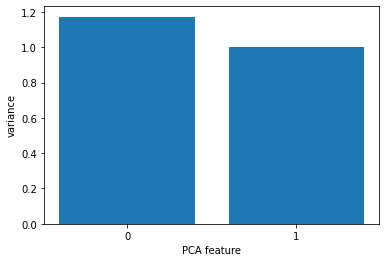

In [ ]:
#Creating a barplot
features=range(pca.n_components)
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

### Exploratory Analysis
->Creating a barplot of avg price charged per night vs room type to find out the most expensive room type<br>
->Creating a point plot for the same data as that of bar plot to give a clearer view of the most expensive room type<br>
->Creating line plots for finding out the correlation between price charged per night and number of bathrooms and bedrooms available in the rented space respectively<br>
->Creating a scatterplot for analysing the relationship between avg price charged per night and the number of minimum nights the space is rented for 

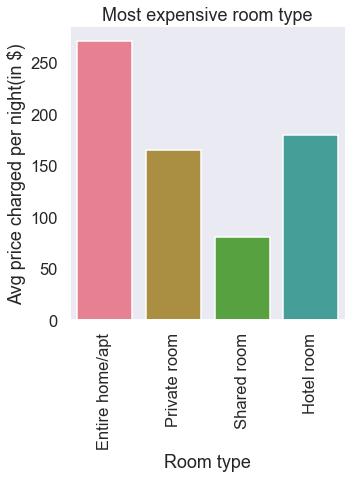

In [ ]:

# Creating a bar plot
sns.set_style('dark')
sns.set_context('talk')
sns.set_palette('husl')
sns.catplot(kind='bar',data=rentals,x='room_type',y='price',ci=None)
plt.xlabel('Room type')
plt.ylabel('Avg price charged per night(in $)')
plt.title('Most expensive room type')
plt.xticks(rotation=90)
plt.show()

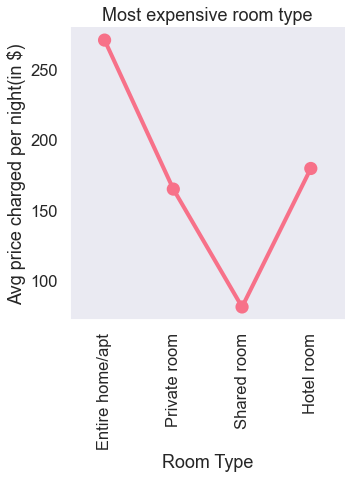

In [ ]:
# Creating a point plot
sns.set_style('dark')
sns.set_palette('husl')
sns.catplot(kind='point',data=rentals,x='room_type',y='price',ci=None)
plt.xlabel('Room Type')
plt.ylabel('Avg price charged per night(in $)')
plt.title('Most expensive room type')
plt.xticks(rotation=90)
plt.show()

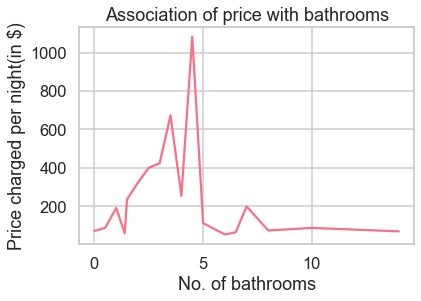

In [ ]:
#Creating a lineplot for 'bathrooms'
sns.set_style('whitegrid')
sns.set_palette('husl')
sns.lineplot(data=rentals,x='bathrooms',y='price',ci=None)
plt.xlabel('No. of bathrooms')
plt.ylabel('Price charged per night(in $)')
plt.title('Association of price with bathrooms')
plt.show()

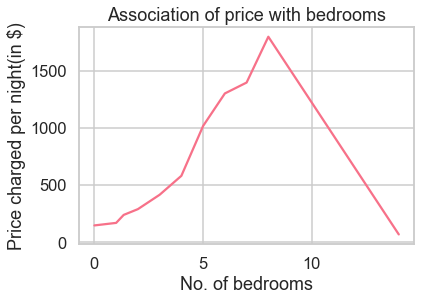

In [ ]:
# Creating a line plot for 'bedrooms'
sns.set_style('whitegrid')
sns.set_palette('husl')
sns.lineplot(data=rentals,x='bedrooms',y='price',ci=None)
plt.xlabel('No. of bedrooms')
plt.ylabel('Price charged per night(in $)')
plt.title('Association of price with bedrooms')
plt.show()

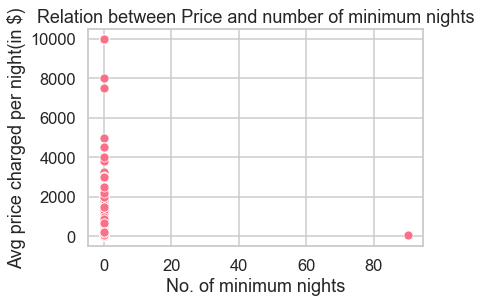

In [ ]:
#Creating a scatterplot for finding out the correlation
sns.set_style('whitegrid')
sns.set_palette('husl')
sns.scatterplot(data=rentals,x='minimum_nights',y='price',ci=None)
plt.title('Relation between Price and number of minimum nights')
plt.ylabel('Avg price charged per night(in $)')
plt.xlabel('No. of minimum nights')
plt.show()

### Model Development
->We use Stochastic Gradient Boosting using GradientBoostingRegressor model for prediction of prices based on different features of dataset<br>
### Reason for using the model
->Stochastic Gradient Boosting(base estimator-CART) uses ensemble method which is more a robust method than using individual decision trees for prediction.<br>
->SGB creates furthur diversity in the ensemble and therefore adds more variance to the ensemble of trees.

In [ ]:

# Importing necessary libraries for training and prediction as well as model evaluation
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#For reproducibility
SEED=1

#Storing explanatory and target variables in X and y respectively
X=finalDf.drop(['price'],axis=1).values
y=finalDf['price'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=SEED)

sgbr=GradientBoostingRegressor(max_depth=4,subsample=0.9,max_features=0.75,n_estimators=200,random_state=2)

#Training the model
sgbr.fit(X_train,y_train)
#Prediction
y_pred=sgbr.predict(X_test)

### Model Evaluation
->We calculate the root mean squared error and accuracy score for our model <br>
->We create a scatterplot and plot a regression line between log of actual values and log of predicted values to visually represent accuracy of our model

In [ ]:
# RMSE test
mse_test=MSE(y_test,y_pred)
rmse_test=mse_test**(1/2)


# Accuracy score
score=sgbr.score(X_test,y_test)

print("Test set RMSE: {:.3f}".format(rmse_test))
print("Test set Accuracy score: {:.3f}".format(score))


Test set RMSE: 306.297
Test set Accuracy score: 0.605


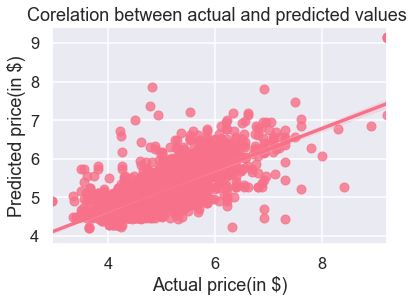

In [ ]:
# Creating the scatterplot 
sns.set_style('darkgrid')
sns.regplot(np.log(y_test),np.log(y_pred),scatter=True,fit_reg=True)
plt.title('Corelation between actual and predicted values ')
plt.xlabel('Actual price(in $)')
plt.ylabel('Predicted price(in $)')
plt.show()

->The RMSE is moderate which means that predicted and actual values are not far away.<br>

->The score method calculates coefficient of determination which represents that 60.5% of the variance in predicted data can be explained by actual data which is sufficient to fulfill the success criteria.<br>

->The scatterplot shows that there is a strong positive correlation between predicted and actual values athough there some outliers which means the results are accurate.

### Comparision to Business success criteria
->We have succesfully developed an application to help people estimate the money they could earn renting out their living space and increase conversion rate of the webpage.<br>

->With RMSE of 306.29 and accuracy score of 60.5% and by looking at the plot between actual and predicted prices,we can say that although there may be some variation in the estimated prices, mostly it will not be more than 25 dollars off of the actual price.

### Recommendations
To increase conversion rate-> <br>

->Webpage should increase the advertising of entire home/apt since it's the most expensive--This will lead to people buying more expensive rooms which in turn will increase the predicted price earned.

->Business should encourage people to rent spaces with approx 4 bathrooms and 7 bedrooms to increase the predicted money earned by people since properties with these numbers are expensive.<br>

->The focus should not be on changing the minimum nights for which the space gets rented as there is no correlation between the avg price charged per night and number of minimum nights.